In [30]:
import wordcloud
import konlpy
import pymysql
import pickle
import base64

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import json

## 초록 및 마스킹 이미지 불러오기

In [32]:
# 데이터베이스
conn = pymysql.connect(host="210.183.11.122", port = 3306, user='irisuser', password='irisuser', db='test', charset='utf8')
curs = conn.cursor()

In [33]:
query = """
        SELECT abstract FROM data_table WHERE id=%s;
        """

In [34]:
curs.execute(query, 0)
data = curs.fetchone()[0]

In [35]:
conn.close()

## 형태소분석(명사/외국어추출)

In [8]:
# 한나눔
tag_han = konlpy.tag.Hannanum()
han_tagset = ["F", "N"]
temp_han = tag_han.pos(data)

nouns_han = []
for i in temp_han:
    if i[1] in han_tagset:
        if len(i[0]) > 1:
            nouns_han.append(i[0])

In [9]:
# 꼬마
tag_kkma = konlpy.tag.Kkma()
kkma_tagset = ["OL", "NNG"]
temp_kkma = tag_kkma.pos(data)

nouns_kkma = []
for i in temp_kkma:
    if i[1] in kkma_tagset:
        if len(i[0]) > 1:
            nouns_kkma.append(i[0])

In [36]:
# 코모란
tag_komo = konlpy.tag.Komoran()
komo_tagset = ["SL", "NNG", "NNP", "NNB"]
temp_komo = tag_komo.pos(data)

nouns_komo = []
for i in temp_komo:
    if i[1] in komo_tagset:
        if len(i[0]) > 1:
            nouns_komo.append(i[0])

In [11]:
# 트위터
tag_twt = konlpy.tag.Twitter()
twt_tagset = ["Noun", "Alpha"]
temp_twt = tag_twt.pos(data)

nouns_twt = []
for i in temp_twt:
    if i[1] in twt_tagset:
        if len(i[0]) > 1:
            nouns_twt.append(i[0])

## 빈도수 계산

In [37]:
nouns_freq = {} #dictionary

for i in nouns_komo:
    nouns_freq[i] = nouns_komo.count(i)

## 분석결과 저장

리스트

In [15]:
conn = pymysql.connect(host="210.183.11.122", port = 3306, user='irisuser', password='irisuser', db='test', charset='utf8')
curs = conn.cursor()

In [16]:
query = """
        UPDATE data_table
        SET token = %s
        WHERE id = %s
        """

In [17]:
curs.execute(query, (str(nouns_komo), 0))
conn.commit()

In [18]:
conn.close()

딕셔너리

In [52]:
conn = pymysql.connect(host="210.183.11.122", port = 3306, user='irisuser', password='irisuser', db='test', charset='utf8')
curs = conn.cursor()

In [53]:
query = """
        UPDATE data_table
        SET token = %s
        WHERE id = %s
        """

In [54]:
curs.execute(query, (json.dumps(nouns_freq), 0))
conn.commit()

In [55]:
conn.close()

## 시각화

In [44]:
# 데이터베이스
conn = pymysql.connect(host="210.183.11.122", port = 3306, user='irisuser', password='irisuser', db='test', charset='utf8')
curs = conn.cursor()

In [45]:
query = """
        SELECT token
        FROM data_table
        WHERE id = %s
        """

In [46]:
curs.execute(query, (0))
data = curs.fetchall()[0][0]

In [47]:
conn.close()

In [51]:
token = json.loads(data)

In [56]:
cloud = wordcloud.WordCloud(font_path="C:/Windows/Fonts/malgunbd.ttf", background_color="white")

In [57]:
wc_abstract = cloud.generate_from_frequencies(token)

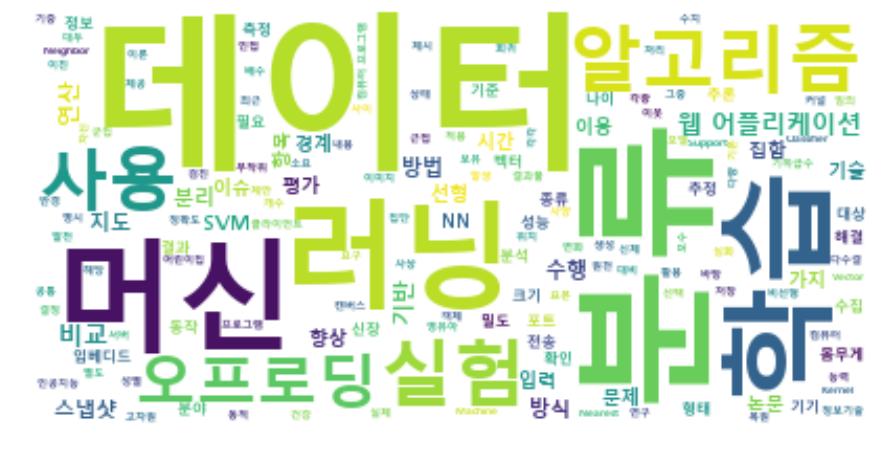

In [58]:
plt.figure(figsize = (15, 15))
plt.imshow(wc_abstract, interpolation="bilinear")
plt.axis("off")
plt.show()